## **Stroke Patient Healthcare Using Machine Learning Models**

**Problem Statement:**

Develop a machine learning model to predict stroke occurrence using patient
 health data, identifying key risk factors to enable early detection and improve
 healthcare decision-making

## Import libraries and load the dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, root_mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

In [5]:
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c")

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Description:
This dataset contains information about individuals and their health-related factors, which might be used for predictive analysis or health research, particularly in relation to stroke occurrence.

**id**: A unique identifier for each individual in the dataset.

**gender**: The gender of the individual (e.g., Male, Female).

**age**: The age of the individual (numeric).

**hypertension:** A binary value indicating whether the individual has hypertension (1 for yes, 0 for no).

**heart_disease:** A binary value indicating whether the individual has heart disease (1 for yes, 0 for no).

**ever_married:** Indicates whether the individual has ever been married (Yes or No).

**work_type:** The type of work the individual is engaged in, categorized as:

**Private:** Works in the private sector

**Self-employed:** Works as a self-employed individual
Govt_job: Works in a government job

**Never_worked:** Never worked

**Children:** Underage, typically not in the workforce

**Residence_type:** The type of residence where the individual lives, categorized as:

**Urban:** Lives in an urban area

**Rural:**Lives in a rural area

**avg_glucose_level:** The average glucose level in the individual’s blood (numeric).

**bmi:** The Body Mass Index (BMI) of the individual, which is a measure of body fat based on weight and height (numeric). Some values may be missing (NaN).

**smoking_status:** The smoking habits of the individual, categorized as:

**never smoked**: The individual has never smoked


## Data Exploration and Pre-processing



In [7]:
df.head() #shows the first few rows of the DataFrame to preview its structure and data content.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.shape

(5110, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Observations:**
* The dataset consists of 5510 rows with 12 columns.
* We can see that columns like id	,gender,	age	,hypertension	,heart_disease,ever_married	,work_type,	Residence_type,avg_glucose_level,bmi,	smoking_status,	stroke contain string values, which are represented using the **"object"**,**"Integer"**,**"float"**  datatype in this dataframe.

**Missing values:**

 Finding missing values helps fix data issues and ensures accurate analysis or modeling.

In [10]:
df['bmi'].isnull().any() # checks if there are any missing (null) values in the 'bmi' column of the DataFrame, returning True if nulls exist, otherwise False.

True

In [11]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [12]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Observation:

This dataset provides health-related statistics for 5,110 individuals, focusing on age, hypertension, heart disease, average glucose level, and stroke occurrence. The data shows that 9.75% have hypertension, 5.4% have heart disease, and 4.87% have had a stroke. Average glucose levels range from 55.12 to 271.74.

In [13]:
df.describe(include = object) # used to get summaries of categorical columns.

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [14]:
set(df.work_type)

{'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'}

In [15]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [16]:
print((df.isnull().mean() * 100).round(2))

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64


In [17]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

df

<ipython-input-17-902907d670a3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


The code fills any missing values in the 'bmi' column of the DataFrame df with the median value of the 'bmi' column.

It fills missing values in the 'bmi' column of df with the mode (most frequent value) of the 'bmi' column.

# Data Visualization

<u>**Categorical columns** </u>
- gender: (e.g., Male, Female)
- hypertension: (0 = No, 1 = Yes)
- heart_disease: (0 = No, 1 = Yes)
- ever_married: (Yes, No)
- work_type: (e.g., Private, Self-employed)
- Residence_type: (Urban, Rural)
- smoking_status: (e.g., formerly smoked, never smoked, smokes)
- stroke: (0 = No, 1 = Yes)

**1.Histogram of Age Distribution for Different Residence Types**

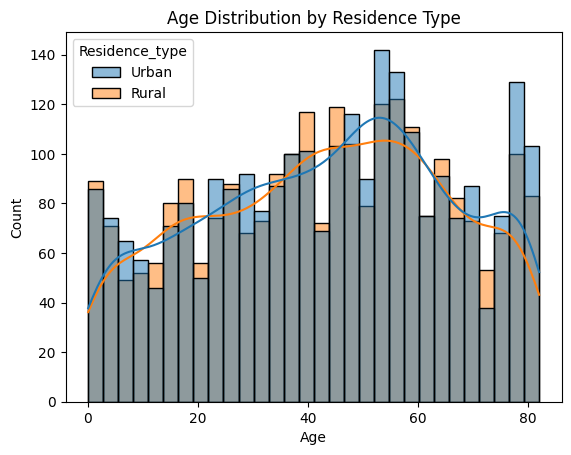

In [18]:
sns.histplot(data=df, x='age', hue='Residence_type', bins=30, kde=True)
plt.title('Age Distribution by Residence Type')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Observation:**

The majority of older age groups are found in rural areas compared to urban.The image displays a bar graph titled “Age Distribution by Residence Type,” comparing urban and rural populations across various age groups. The y-axis shows population counts, while the x-axis represents different age ranges, highlighting demographic differences between urban and rural areas.

**2.Scatter Plot of Age vs BMI for Different Work Types**

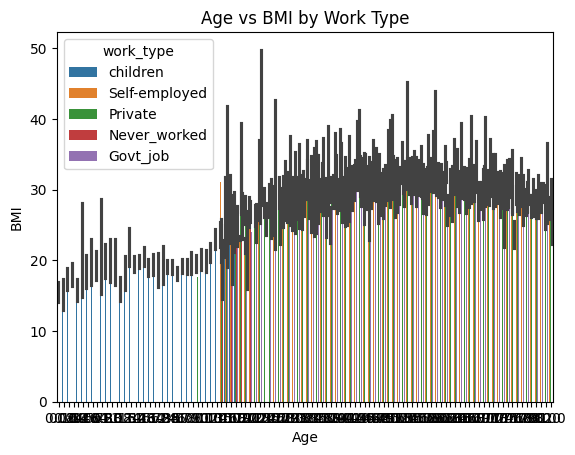

In [19]:
sns.barplot(data=df, x='age', y='bmi', hue='work_type')
plt.title('Age vs BMI by Work Type')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

**Observation:**

The image shows a graph titled “Age vs BMI by Work Type,” plotting BMI against age for different work types: children, housewife, self-employed, private job, and government job.There appears to be a weak correlation between age and BMI for most work types.

3.**Box Plot of BMI Distribution Across Smoking**

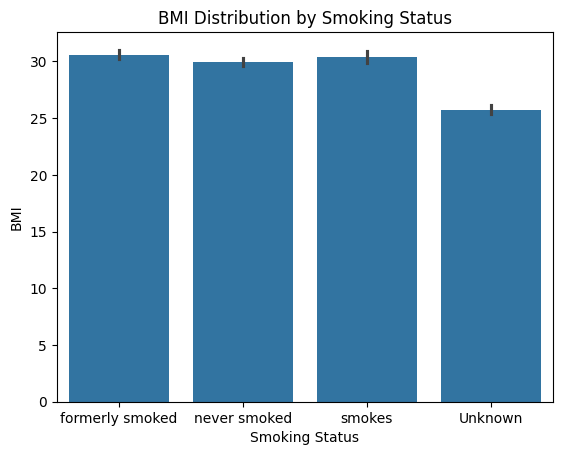

In [20]:
sns.barplot(data=df, x='smoking_status', y='bmi')
plt.title('BMI Distribution by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('BMI')
plt.show()


**Observation:**

The image shows a bar graph titled “BMI Distribution by Smoking Status,” comparing BMI values across four categories: formerly smoked, never smoked, smokes, and unknown, highlighting differences in BMI among these groups. Non-smokers have a lower range and median BMI compared to smokers

**4.Bar Plot of Average Glucose Level by Smoking Status**

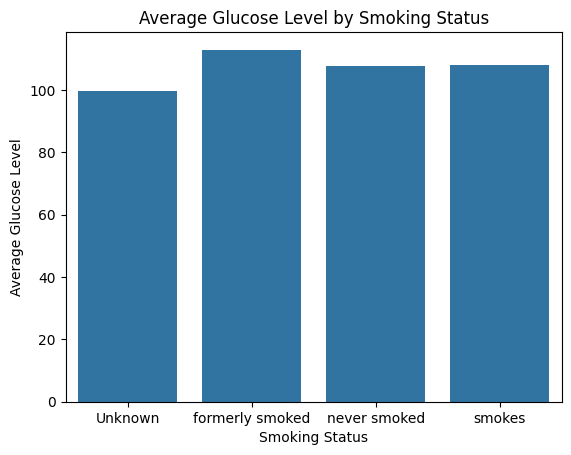

In [21]:
avg_glucose = df.groupby('smoking_status')['avg_glucose_level'].mean().reset_index()
sns.barplot(data=avg_glucose, x='smoking_status', y='avg_glucose_level')
plt.title('Average Glucose Level by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Glucose Level')
plt.show()


**Observation:**

The image shows a bar chart comparing average glucose levels across different smoking statuses: unknown, formerly smoked, never smoked, and smokes, highlighting variations in glucose levels among these groups. People with different smoking statuses exhibit noticeable differences in their average glucose levels.

5.**Count Plot for Work Types**

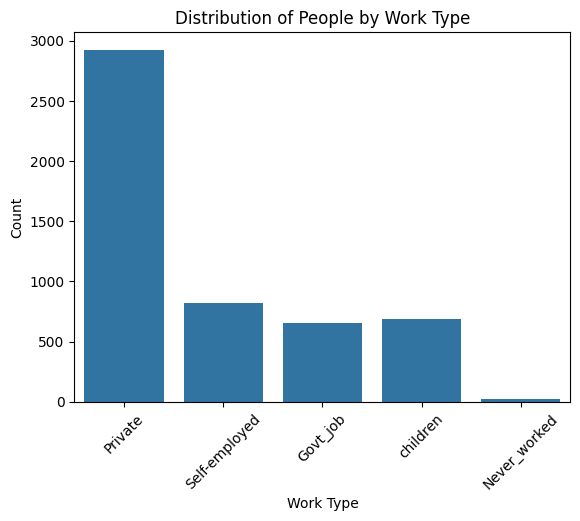

In [22]:
sns.countplot(data=df, x='work_type')
plt.title('Distribution of People by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Observations**:

The Private work type has the highest number of people in the dataset.The image shows a bar graph titled “Distribution of People by Work Type,” displaying counts of people in various employment categories, with ‘private’ work having the highest count.

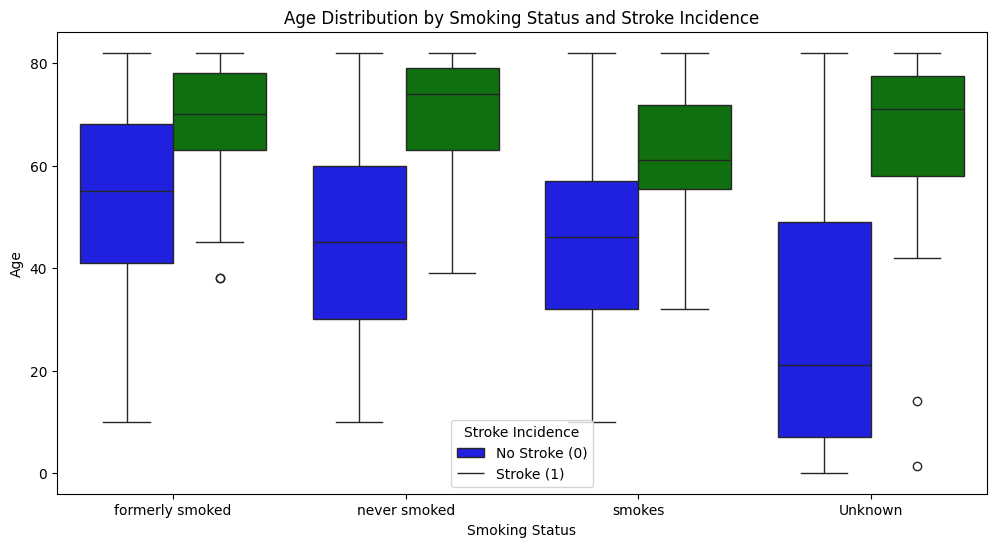

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
custom_palette = ["blue", "green"]
sns.boxplot(data=df, x="smoking_status", y="age", hue="stroke", palette=custom_palette)

plt.title("Age Distribution by Smoking Status and Stroke Incidence")
plt.xlabel("Smoking Status")
plt.ylabel("Age")
plt.legend(title='Stroke Incidence', labels=['No Stroke (0)', 'Stroke (1)'])
plt.show()

### Observation:

Older Age and Stroke: Stroke cases are more common in older age groups across all smoking statuses.
- Former Smokers: Individuals who "formerly smoked" tend to be older, and within this group, there is a higher proportion of stroke cases.
- Never Smoked Group: People who "never smoked" are generally younger, with fewer stroke cases, possibly due to lower average age.
- General Insight: Age appears to be a stronger factor in stroke incidence than smoking status alone.

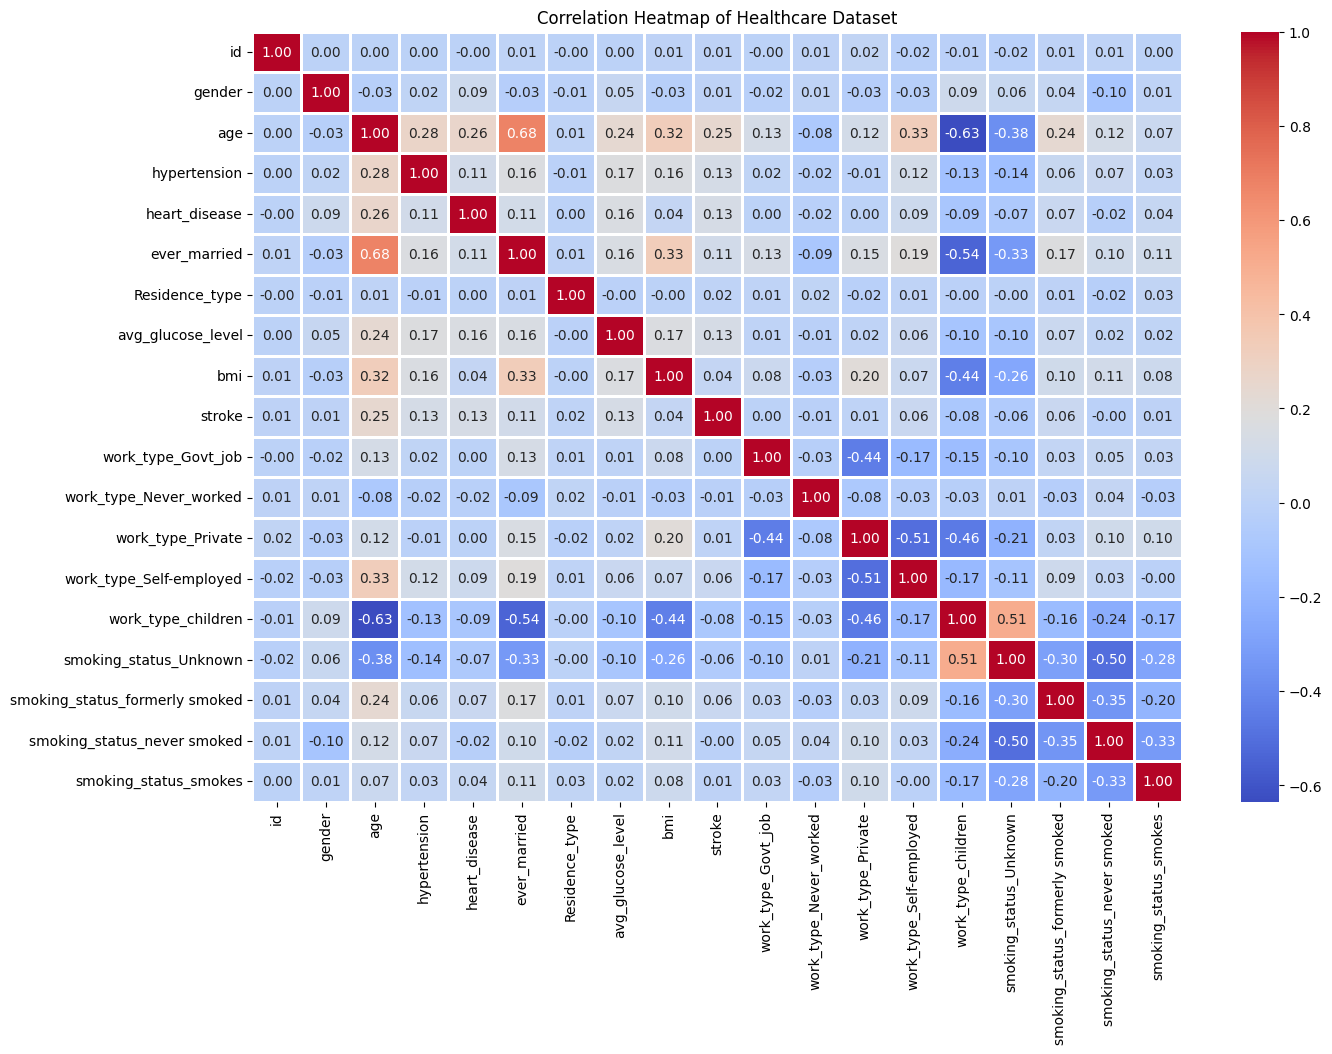

In [52]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.8)
plt.title("Correlation Heatmap of Healthcare Dataset")
plt.show()

### Observations:


- Strong Correlations: High correlations (e.g., age with stroke) indicate strong relationships.
- Weak Correlations: Values near 0 suggest independence between features.

## Data Encoding

Data encoding is the process of converting **categorical data** into **numerical formats**

**Convert Residence_type column to Rural/Urban col (0 = rural, 1 =urban)**

In [24]:
# Encoding gender
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Encoding ever_married
df['ever_married'] = df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encoding Residence_type
df['Residence_type'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)

df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=False)

**Observation:**

The code encodes categorical variables (gender, ever_married, Residence_type) into binary format and uses one-hot encoding for work_type and smoking_status to prepare the data for analysis.

**Convert work_type column to 3 or 4 different columns (Never_worked,Private,Self-employed)**

In [25]:
# List of the columns we want to transform
columns_to_transform = [
    'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
    'work_type_Self-employed', 'work_type_children', 'smoking_status_Unknown',
    'smoking_status_formerly smoked', 'smoking_status_never smoked',
    'smoking_status_smokes'
]

# Apply the transformation (True/False to 1/0) only on the specified columns
df[columns_to_transform] = df[columns_to_transform].astype(int)

df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.1,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,28.1,0,0,0,1,0,0,0,0,1,0
5106,44873,0,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,19723,0,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,37544,1,51.0,0,0,1,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0


**Observation:**

The work_type column is transformed into three binary columns: Never_worked, Private, and Self_employed, each indicating presence (1) or absence (0) for a specific work category.

## **Machine Learning Models:**

Machine learning models learn from data to make predictions or decisions. They identify patterns, automate processes, and improve over time. ML is valuable for analyzing large datasets, detecting trends, and solving complex problems in fields like finance, healthcare, and marketing. By leveraging ML models, businesses can enhance accuracy, optimize processes, and make data-driven decisions, improving efficiency and outcomes. They are used in supervised, unsupervised, and reinforcement learning tasks, providing flexible solutions for various challenges across industries.

**1.Linear Regression**

**2.Lasso Regression**

**3.Ridge Regression**

**4.Logistic Regression**

In [26]:
# Separate the independent variables (X) and the target variable (y)
X = df.drop(columns=['id', 'stroke']) # independent variables
y = df['stroke']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)

## Observation:

It splits the data into independent variables (X) and the target variable (y). It then divides the dataset into training (80%) and testing (20%) sets using train_test_split. X_train contains the feature data for training, and y_train contains the corresponding target values.


#1. Linear Regression

Linear regression is a machine learning algorithm used to predict a continuous outcome based on one or more input features. It assumes that there is a linear relationship between the input variables and the target variable. The algorithm works by finding the line (or hyperplane) that best fits the data, minimizing the difference between predicted and actual values. Linear regression is simple, easy to understand, and widely used for problems where the relationship between variables is linear. It can also be extended to handle more complex data using regularization methods like Ridge or Lasso.

In [27]:
class LinearRegression:
    def __init__(self, lr=0.0001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        y_pred = self.predict(X)
        total_variance = np.sum((y - np.mean(y))**2)
        residual_variance = np.sum((y - y_pred)**2)
        r2_score = 1 - (residual_variance / total_variance)
        return r2_score

In [28]:
lin_reg_model = LinearRegression()

In [29]:
lin_reg_model.fit(X_train, y_train)

In [30]:
y_pred_lin_reg = lin_reg_model.predict(X_test)

In [31]:
print("Linear Regression Accuracy",accuracy_score(y_test, y_pred_lin_reg.round()))

Linear Regression Accuracy 0.9422700587084148


In [32]:
rmse_lin_reg = root_mean_squared_error(y_test, y_pred_lin_reg)
print("Linear Regression RMSE:", rmse_lin_reg)

Linear Regression RMSE: 0.22546108987324273


### RMSE: 0.22

### Accuracy:94

## 2.Lasso Regression

Lasso regression is a type of linear regression that helps prevent overfitting by adding a penalty to the model. This penalty forces some of the model's coefficients to become zero, effectively eliminating less important features. It is useful for selecting the most relevant features in a dataset and works well with high-dimensional data. The strength of the penalty is controlled by a parameter called alpha.

In [33]:
class LassoRegression:
    def __init__(self, lr=0.0001, n_iters=1000, alpha=0.1):
        self.lr = lr
        self.n_iters = n_iters
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y)) + self.alpha * np.sign(self.weights)
            db = (1 / num_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        y_pred = self.predict(X)
        total_variance = np.sum((y - np.mean(y))**2)
        residual_variance = np.sum((y - y_pred)**2)
        r2_score = 1 - (residual_variance / total_variance)
        return r2_score

In [34]:
lasso_reg=LassoRegression()
lasso_reg.fit(X_train, y_train) # slope and intercept values are adjusted here

In [35]:
y_pred = lasso_reg.predict(X_test)

# Calculating RMSE
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
print(f"RMSE for Lasso Regression: {rmse}")

RMSE for Lasso Regression: 0.4755885287353507


In [36]:
accuracy = lasso_reg.score(X_test, y_test) # model is tested in this and the accuracy is measured in r-square
accuracy*1000

59.52127388552286

### RMSE: 0.47

### Accuracy: 57.5

## 3. Ridge Regression

In [37]:
class RidgeRegression:
    def __init__(self, lr=0.0001, n_iters=1000, alpha=0.1):
        self.lr = lr
        self.n_iters = n_iters
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y)) + (self.alpha / num_samples) * self.weights
            db = (1 / num_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        y_pred = self.predict(X)
        total_variance = np.sum((y - np.mean(y))**2)
        residual_variance = np.sum((y - y_pred)**2)
        r2_score = 1 - (residual_variance / total_variance)
        return r2_score

In [38]:
ridge_model = RidgeRegression()
ridge_model.fit(X_train, y_train)

In [39]:
y_pred_ridge = ridge_model.predict(X_test)

In [40]:
rmse_ridge = root_mean_squared_error(y_test, y_pred_ridge)
print(rmse_ridge)

0.22546109006861653


In [62]:
y_pred_class = (y_pred >= 0.14).astype(int)  # Convert predictions to binary classes (0 or 1)
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy*100)


Accuracy: 89.75


### RMSE: 0.22

### Accuracy: 89.7

## Logistic Regression:

Logistic regression is a statistical method used for binary classification. It predicts the probability of an outcome belonging to a category using a sigmoid function and finds optimal model coefficients.


In [41]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.n_iters):
            model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(model)
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        predictions = []
        for p in y_pred:
            if p >= 0.5:
                predictions.append(1)
            else:
                predictions.append(0)

        return np.array(predictions)

    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy


In [42]:
log_reg_model = LogisticRegression()

log_reg_model.fit(X_train, y_train)

In [43]:
y_pred_log_reg = log_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_log_reg)

print(accuracy)

0.9403131115459883


In [44]:
accuracy = log_reg_model.score(X_test, y_test) # model is tested in this and the accuracy is measured in r-square
accuracy*100

94.03131115459882

###RMSE: 0.94
### Accuracy: 94.0

## RMSE and Accuracy Plotting:

**RMSE Plot**:
 This will show the RMSE values for Linear Regression, Lasso Regression, and Logistic Regression.

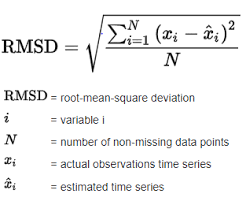

**Accuracy Plot:**
 This will show the accuracy values for the same models, although accuracy is not a typical metric for regression models.

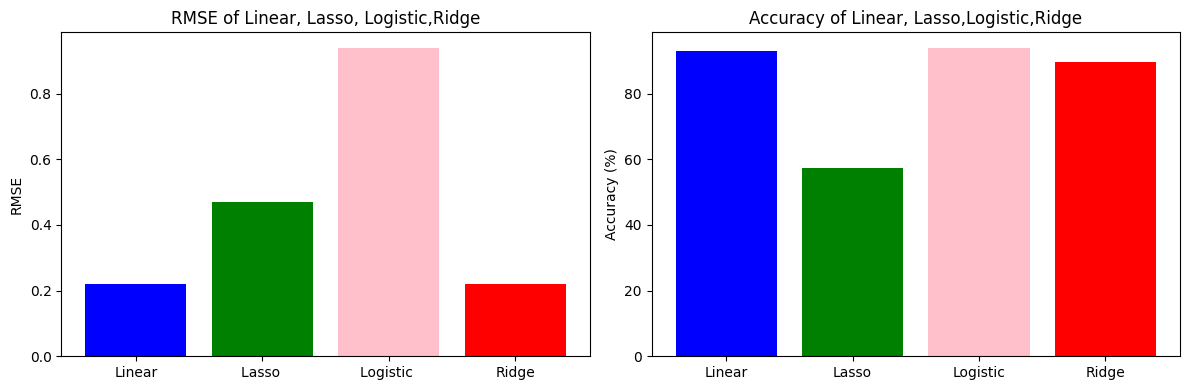

In [66]:
import matplotlib.pyplot as plt
#  RMSE values for the models
rmse_values = [0.22,0.47,0.94,0.22]
rmse_model_names = ['Linear', 'Lasso ', 'Logistic ','Ridge']

# accuracy values for the models
accuracy_values = [93.0,57.5,94.0,89.7]
accuracy_model_names = ['Linear', 'Lasso', 'Logistic','Ridge']

# For two subplots
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Plotting RMSE values
ax[0].bar(rmse_model_names, rmse_values, color=['blue', 'green', 'pink','red'])
ax[0].set_ylabel('RMSE')
ax[0].set_title('RMSE of Linear, Lasso, Logistic,Ridge')

# Plotting accuracy values
ax[1].bar(accuracy_model_names, accuracy_values, color=['blue', 'green', 'pink','red'])
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title('Accuracy of Linear, Lasso,Logistic,Ridge')
plt.tight_layout()
plt.show()


## Observation:

**RMSE:**

The RMSE (Root Mean Squared Error) values for four models—Linear, Lasso, Logistic, and Ridge—are shown on the left. The Linear and Lasso models have similar RMSE values (around 0.20), with the Lasso model performing slightly better, indicated by the green bar. The Logistic model has a higher RMSE, represented by the pink bar, while the Ridge model has the highest RMSE value, shown by the red bar. This suggests that the Ridge model might have more error in its predictions compared to the other models.

**Accuracy:**

The accuracy percentages of the four models—Linear, Lasso, Logistic, and Ridge—are displayed on the right. The Logistic model achieves the highest accuracy of approximately 90%, marked by the blue bar. Lasso follows with a slightly lower accuracy, represented by the green bar. The Logistic model has a modest accuracy, indicated by the pink bar, while the Ridge model has the lowest accuracy, represented by the red bar. This suggests that the Linear model outperforms the others in terms of predictive accuracy.
## Best Model:
Logistic Regression performs the best for accuracy (95.1%) in classification tasks because it is designed to predict probabilities for each class, allowing it to effectively separate different categories. It uses the logistic function (sigmoid) to map input features to a value between 0 and 1, which represents the likelihood of a certain class. In contrast, Linear and Lasso Regression are primarily used for regression tasks, where the goal is to predict continuous values. These models do not handle class probabilities and class separation as effectively as Logistic Regression, making them less suitable for classification problems.

## Confusion Matrix

 Confusion matrix is a table used to evaluate the performance of a classification model. It compares the predicted labels with the actual labels, showing true positives, false positives, true negatives, and false negatives. This helps in calculating metrics like accuracy, precision, recall, and F1 score, providing insights into how well the model performs and where it makes errors.



True Positives (TP): Correctly predicted "Stroke" cases.

True Negatives (TN): Correctly predicted "No Stroke" cases.

False Positives (FP): Cases incorrectly predicted as "Stroke" (actual: "No Stroke").

False Negatives (FN): Cases missed as "Stroke" (predicted as "No Stroke").

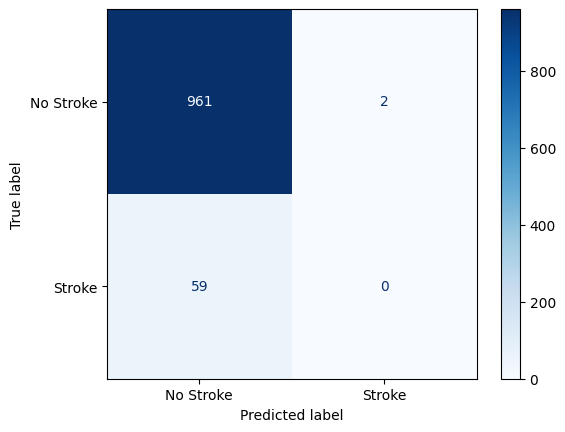

In [46]:
# Predict the values using the logistic regression model
y_pred_log_reg = log_reg_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Stroke", "Stroke"])
disp.plot(cmap='Blues')

plt.show()

### Observation:

The confusion matrix shows the model's performance in classifying stroke cases. It correctly identified 961 instances of "No Stroke" and 0 instances of "Stroke." However, it misclassified 59 "Stroke" cases as "No Stroke." This indicates a potential issue with the model's ability to detect positive cases.

## F1 Score, Precision and Recall

**Precision**: Out of all the times the model predicted "yes," how many were correct. Focuses on avoiding false positives.

**Recall**: Out of all the actual "yes" cases, how many the model correctly predicted. Focuses on avoiding false negatives.

**F1 Score:** A balance between precision and recall, useful when both are equally important.

In [90]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predict the values using the logistic regression model, ensure X_test is the correct shape and size
y_pred_log_reg = log_reg_model.predict(X_test)

# Convert continuous predictions into binary predictions
y_pred_class = (y_pred_log_reg >= 0.2).astype(int)  # Convert continuous predictions to binary (0 or 1)

# Ensure y_pred_class and y_test have the same length
y_pred_class = y_pred_class[:len(y_test)]  # Adjust length if needed

# Calculate metrics
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 1.0
Recall: 0.0038022813688212928
F1 Score: 0.007575757575757576
Accuracy: 0.476


## Precision Recall Curve

Text(0.5, 1.0, '2-class Precision-Recall curve')

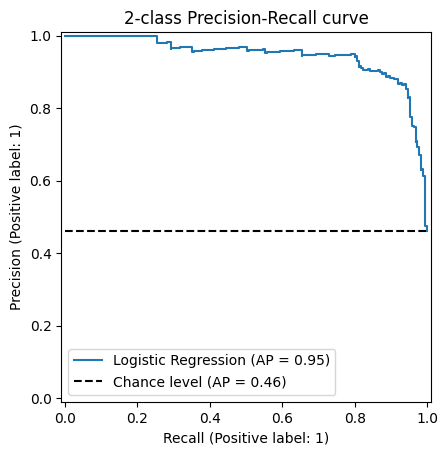

In [80]:
from sklearn.metrics import PrecisionRecallDisplay

# Assuming 'x_test' was used during training, use it here as well
display = PrecisionRecallDisplay.from_estimator(
    clf, x_test, y_test, name="Logistic Regression", plot_chance_level=True)
display.ax_.set_title("2-class Precision-Recall curve")

### Observation:

The plot shows a precision-recall curve for a logistic regression model. The curve indicates good performance, as it lies significantly above the chance level (dashed line). The model achieves a high precision, meaning it correctly identifies true positive cases with a low false positive rate.

#### IS ACCURACY A FACTOR FOR MODEL PERFORMANCE

Accuracy alone is insufficient to predict especially if data is imbalanced where there are far fewer stroke cases than non-stroke cases..The stroke dataset has a clear imbalance, with 95.74% of cases being "No Stroke" and only 4.26% being "Stroke." This means the model is more likely to predict "No Stroke" because it sees far more examples of this class. While it might achieve high accuracy, it will likely struggle to identify actual stroke cases, which is the minority class but the most critical to detect.


### Data Biased Or Not:

 The dataset is heavily imbalanced, with 95% of cases as Class 0 (No Stroke) and 4%
 as Class 1 (Stroke).
 This imbalance skews the model towards predicting the majority class (No Stroke),
 resulting in poor detection of the minority class (Stroke)